# About Dataset

This is a kaggle dataset, it can be downloaded here: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

**Context**     
According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.
This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

**Attribute Information**
1) id: unique identifier
2) gender: "Male", "Female" or "Other"
3) age: age of the patient
4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6) ever_married: "No" or "Yes"
7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8) Residence_type: "Rural" or "Urban"
9) avg_glucose_level: average glucose level in blood
10) bmi: body mass index
11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12) stroke: 1 if the patient had a stroke or 0 if not
*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

**Acknowledgements**
Dataset used to learn how to create and deploy model with docker.       
Followed this tutorial on youtube https://www.youtube.com/watch?v=luJ64trcCwc

# Import dependencies

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import, clean and impute data

## Import

In [7]:
df = pd.read_csv("../data/healthcare-dataset-stroke-data.csv")

## Explore

In [9]:
print(df.shape)
df.head()

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [15]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [18]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

['Male' 'Female' 'Other']
1
id     gender  age   hypertension  heart_disease  ever_married  work_type  Residence_type  avg_glucose_level  bmi   smoking_status   stroke
56156  Other   26.0  0             0              No            Private    Rural           143.33             22.4  formerly smoked  0         1
Name: count, dtype: int64


<Axes: xlabel='gender'>

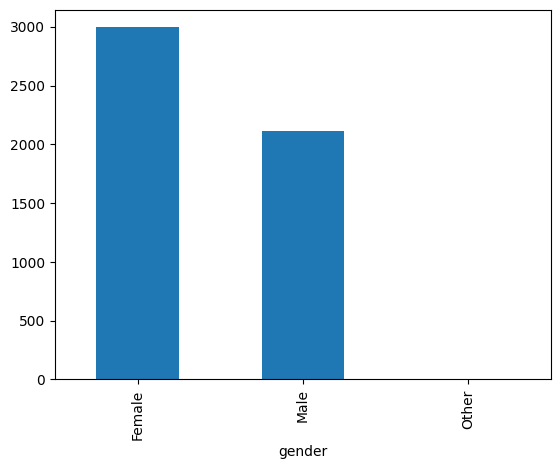

In [36]:
print(df["gender"].unique())
print(len(df[df["gender"] == "Other"]))
print(df[df["gender"] == "Other"].value_counts())
df["gender"].value_counts().plot(kind='bar')

<Axes: >

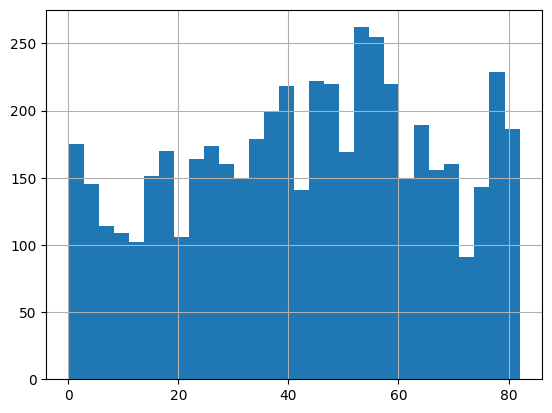

In [20]:
df["age"].hist(bins=30)

[0 1]


<Axes: xlabel='hypertension'>

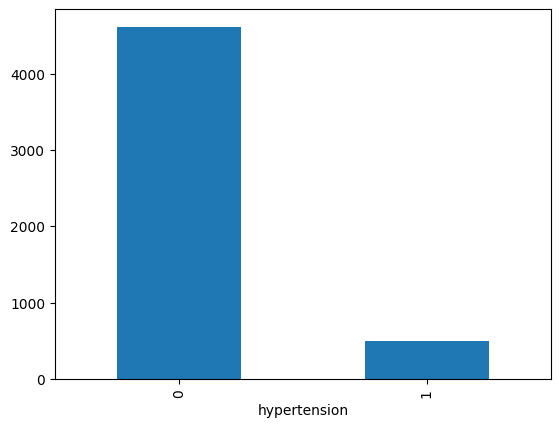

In [23]:
print(df["hypertension"].unique())
df["hypertension"].value_counts().plot(kind='bar')

[1 0]


<Axes: xlabel='heart_disease'>

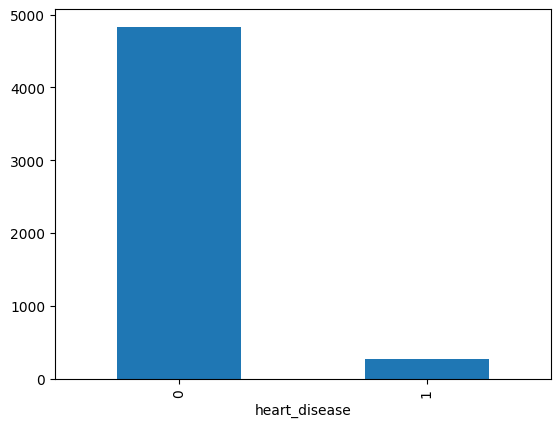

In [26]:
print(df["heart_disease"].unique())
df["heart_disease"].value_counts().plot(kind='bar')

['Yes' 'No']


<Axes: xlabel='ever_married'>

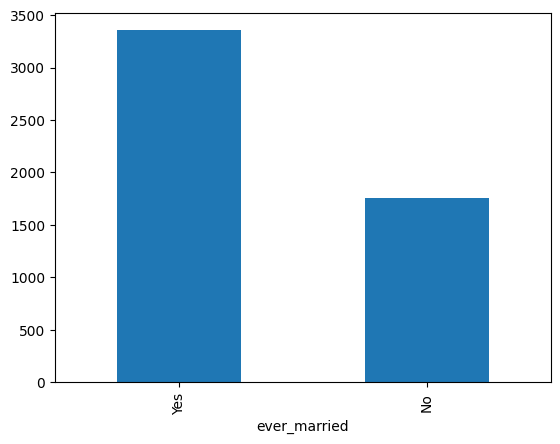

In [27]:
print(df["ever_married"].unique())
df["ever_married"].value_counts().plot(kind='bar')

['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']


<Axes: xlabel='work_type'>

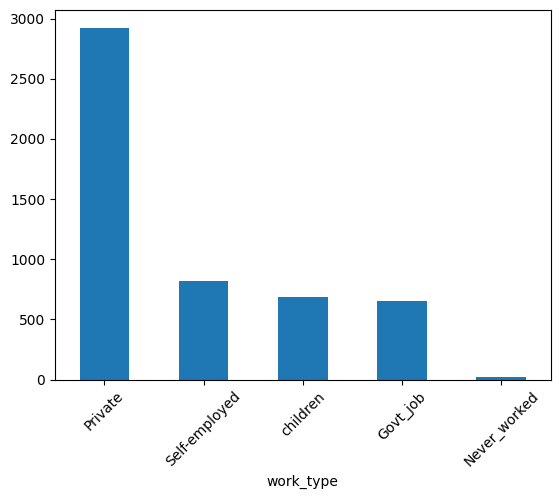

In [29]:
print(df["work_type"].unique())
df["work_type"].value_counts().plot(kind='bar', rot=45)

['Urban' 'Rural']


<Axes: xlabel='Residence_type'>

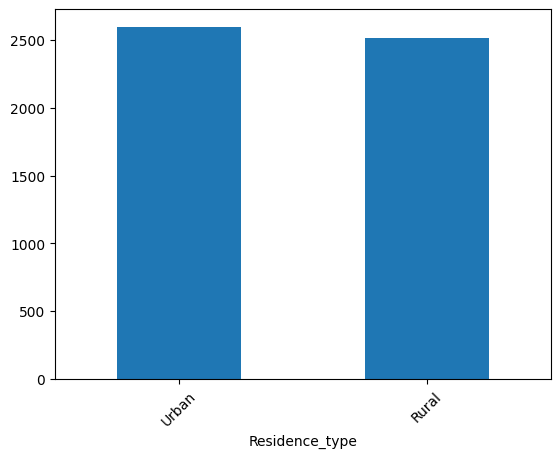

In [31]:
print(df["Residence_type"].unique())
df["Residence_type"].value_counts().plot(kind='bar', rot=45)

<Axes: >

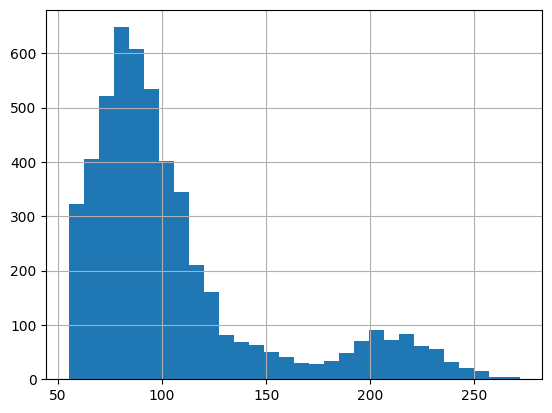

In [37]:
df["avg_glucose_level"].hist(bins=30)

In [ ]:
print(df["Residence_type"].unique())
df["Residence_type"].value_counts().plot(kind='bar', rot=45)

<Axes: >

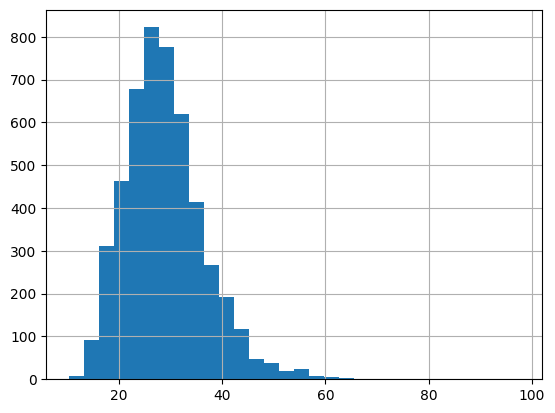

In [38]:
df["bmi"].hist(bins=30)

['formerly smoked' 'never smoked' 'smokes' 'Unknown']


<Axes: xlabel='smoking_status'>

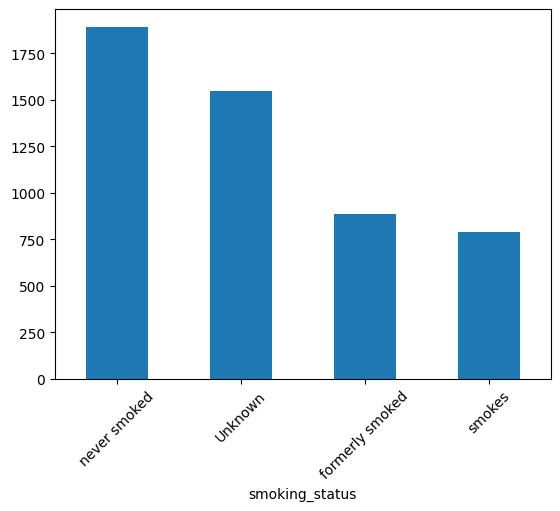

In [39]:
print(df["smoking_status"].unique())
df["smoking_status"].value_counts().plot(kind='bar', rot=45)

[1 0]


<Axes: xlabel='stroke'>

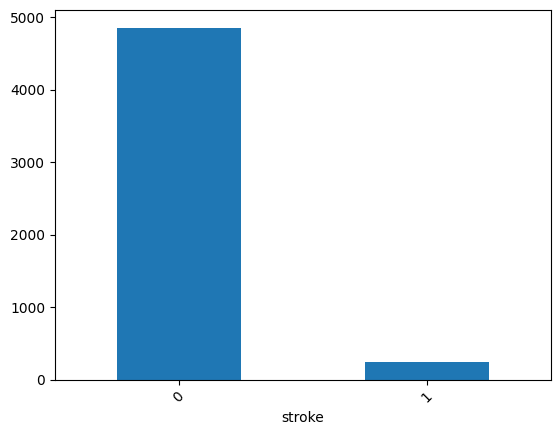

In [40]:
print(df["stroke"].unique())
df["stroke"].value_counts().plot(kind='bar', rot=45)

## Clean

&rarr; not necessary

## Impute

In [41]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

- BMI needs imputation &rarr; will do with k nearest neighbors directly in the pipeline

# Basic Vizualisation

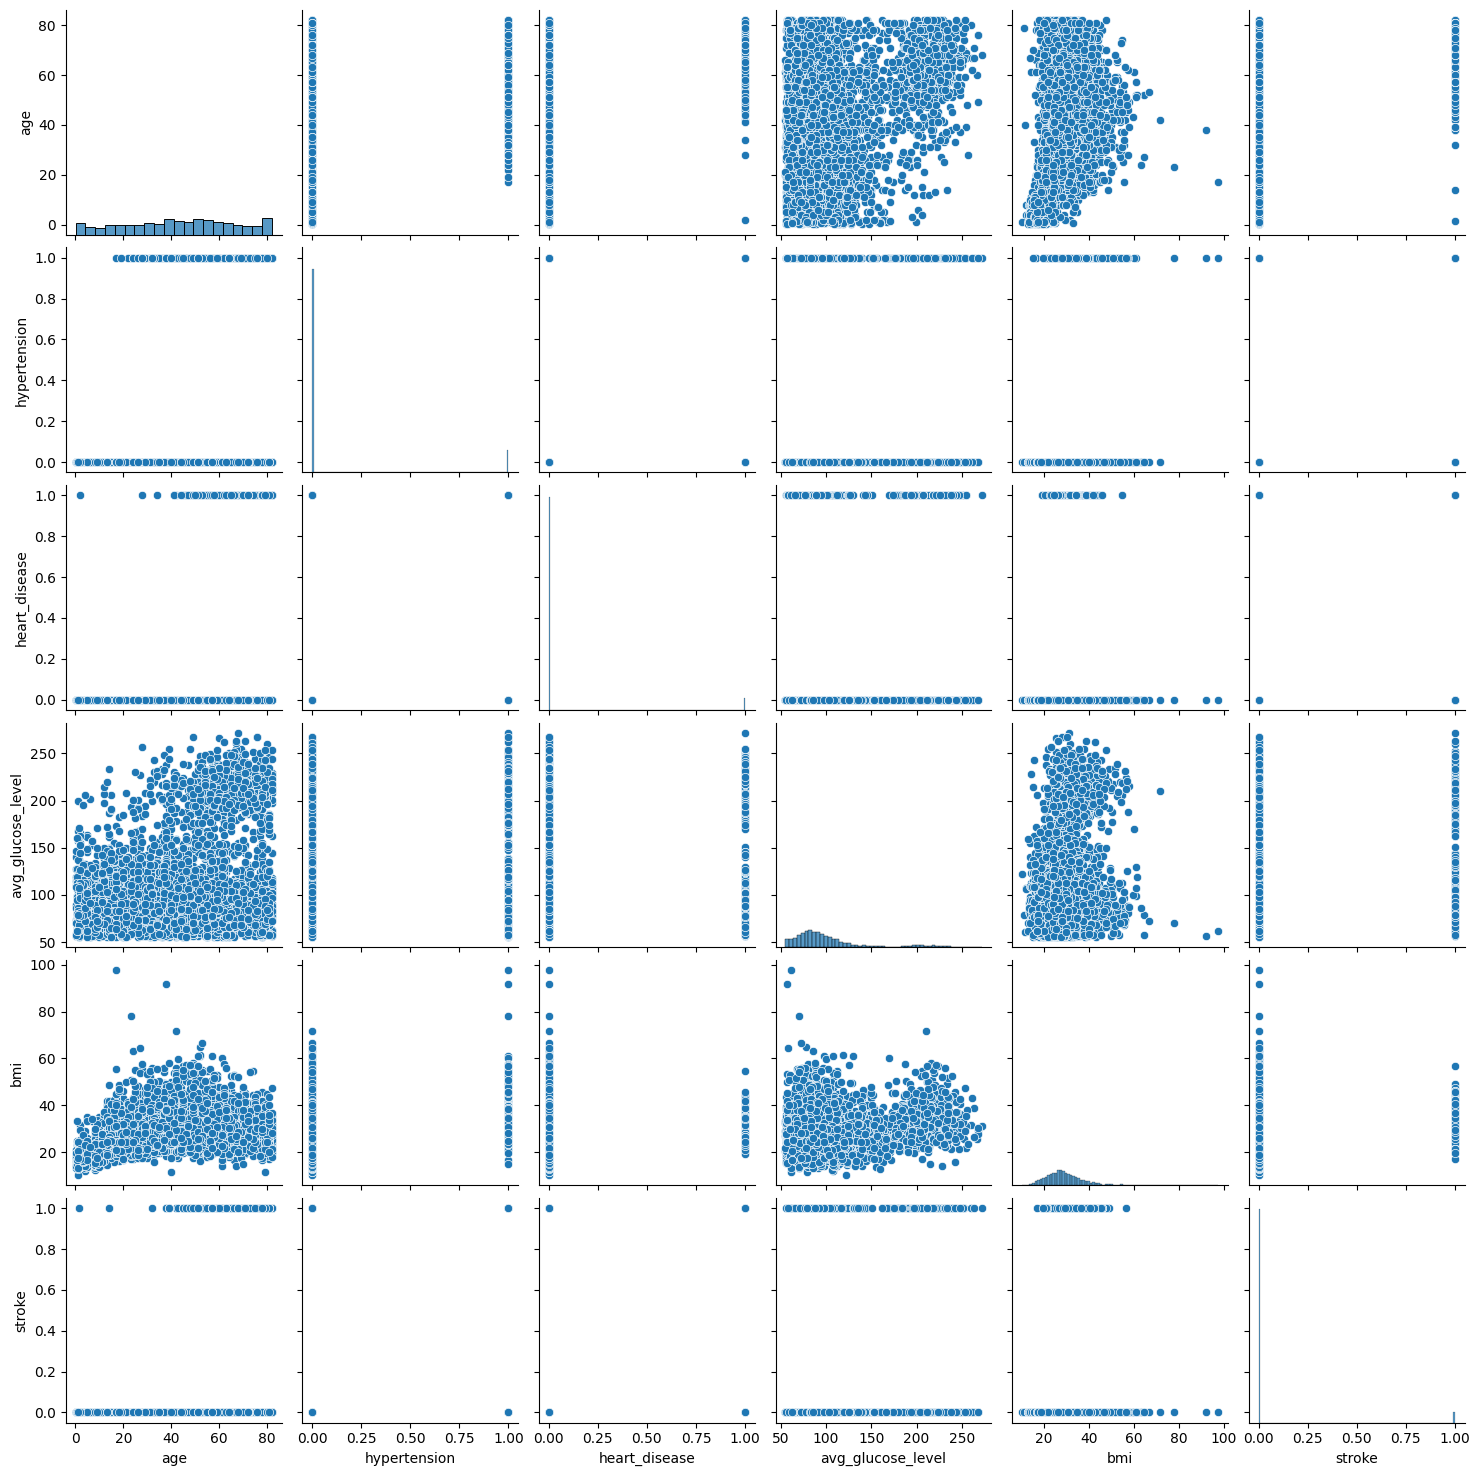

In [ ]:
sns.pairplot(df.drop(columns=["id"]))

# Conclusion

No need to modify data because it is already very clean data